In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Chapter 11: TimeSeries
###### Most if not all is shamelessly lifted from other googled stuffs... try to solve without visiting the various sites
    But if you need some tips(like me) --> https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Pull in the opsd_germany_daily.csv
The data set includes country-wide totals of 
electricity consumption, wind power production, and solar power production for 2006-2017. 
Verify shape as (4383,5)

In [50]:
germany = pd.read_csv('opsd_germany_daily.csv')
print(germany.shape)
germany.head()

(4383, 5)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


A useful aspect of a DatetimeIndex is that the individual date/time components are all available as attributes 
such as year, month, day, and so on. 
Find the appropriate column based on dtype and set is as an index

Add columns to the df with year, month, and weekday name USING the index attributes

In [51]:
germany['Date'] = pd.to_datetime(germany['Date'], format='%Y-%m-%d', utc=False)

In [52]:
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [53]:
germany['year'] = germany.Date.apply(lambda d: d.year)
germany['month'] = germany.Date.apply(lambda d: d.month)
germany['weekday'] = germany.Date.apply(lambda d: d.dayofweek)
germany['week'] = germany.Date.apply(lambda d: d.week)

In [54]:
germany.set_index('Date', inplace=True)

In [55]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday,week
Date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6,52
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0,1
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2,1
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3,1


Time based indexing -- show examples of 
 - select data for a single day using a string such as '2017-08-10
 - select a slice of days
 - select based on a partial sting .. that is to say data from 2006 or entire month of Feb 2012

In [38]:
germany.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
year           2017.000
month             8.000
weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

TimeSeries is a visual thing....
Show a plot of the field 'Consumption' as it compares to 'Solar' and 'Wind'

In [40]:
germany.loc['2017-08-10':'2017-08-13']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2017-08-10,1351.491,100.274,71.160,171.434,2017,8,3
2017-08-11,1329.039,108.577,42.198,150.775,2017,8,4
2017-08-12,1121.458,305.908,80.906,386.814,2017,8,5
2017-08-13,1025.070,101.266,141.157,242.423,2017,8,6


As an example of 'seasonality'
Use seaborn to show a 'Consumption' box plot with x-axis being weekday name

In [43]:
germany.loc['2006'].head()

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


Looking at frequency.... Create a copy of the existing df as follows:
    
Select an arbitrary sequence of date/time values from a pandas time series,
we need to use a DatetimeIndex, rather than simply a list of date/time strings
as in:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

Select the specified dates and just the Consumption column
as in:
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample
    
    
    
Now, use the asfreq() method to convert the DataFrame to daily frequency, with a column for unfilled data, and a column for forward filled data.

In [47]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consum_sample = germany.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


Looking at resampling:

Resample our df to a weekly mean time series.
Use the following columns ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
Compare the shape of the daily df to the new weekly mean df.... should be 1/7

In [61]:
germany_weekly = germany.groupby(['year', 'week']).agg({
    'Consumption': np.mean,
    'Wind': np.mean,
    'Solar': np.mean,
    'Wind+Solar': np.mean,
    'Date': (lambda x: x.iloc[0])
}).head()

In [ ]:
['Consumption', 'Wind', 'Solar', 'Wind+Solar']

Rolling Windows

Take the following code and show the graph which is the Daily as compared to the weekly mean resample

In [69]:
germany_weekly.head()

Consumption  Wind  Solar  Wind+Solar
year week                                      
2006 1     1381.300143   NaN    NaN         NaN
     2     1486.730286   NaN    NaN         NaN
     3     1490.031143   NaN    NaN         NaN
     4     1514.176857   NaN    NaN         NaN
     5     1501.403286   NaN    NaN         NaN

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


TypeError: Level type mismatch: 2017-01

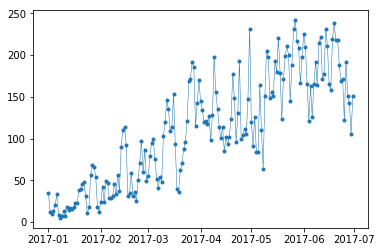

In [68]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(germany.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(germany_weekly.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()

Using the above graph as a base --- create a 7 day rolling df from the daily df and add that df to the plot

In [60]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday,week
Date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6,52
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0,1
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2,1
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3,1


In [70]:
germany[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].rolling(7).mean().tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1266.125593,535.439714,14.142143,549.581857
2017-12-28,1234.624439,570.780429,15.120571,585.901000
2017-12-29,1216.317254,621.566714,17.947571,639.514286
2017-12-30,1208.214129,617.734286,17.807143,635.541429
2017-12-31,1203.265211,604.699143,19.240143,623.939286
